# Rita Lam Individual EDA

I will be analysing the state datasets together with Jamie.
The EDA will consists of three section, each follow by an observation section 

A. initial data exploration.

B. Data filteration and processing 

C. Analysis and visualisation

### A.  Dataset exploration

In [57]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scripts import project_functions as pf

In [58]:
state_df = pf.load_and_process_many("../../data/raw/state")

In [59]:
state_df.head()

,Name,Year,Gender,State,Count
0,Mary,1910,F,AK,14
1,Annie,1910,F,AK,12
2,Anna,1910,F,AK,10
3,Margaret,1910,F,AK,8
4,Helen,1910,F,AK,7


In [60]:
# Overview of the dataset
state_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5647426.0,1972.391787,29.573899,1910.0,1949.0,1977.0,1999.0,2014.0
Count,5647426.0,52.923814,180.810001,5.0,7.0,13.0,34.0,10023.0


In [61]:
state_df.dtypes

Name      object
Year       int64
Gender    object
State     object
Count      int64
dtype: object

In [62]:
state_df.columns

Index(['Name', 'Year', 'Gender', 'State', 'Count'], dtype='object')

### Observation

From the initial oberservation, we can see that the datasets contains five variables. 
Without and filtration, there are more than 5.6 millions datapoints. 

For this reason, we separate the tasks: I will be analysing the western and mid_wester states. The states are care cateogrized in the scripts functinos already.
Jamie will be focus on the northern and southern states. 

### Research Question:

Compare the Western and Middle Western states of the US, What is the top5 most popular Name in **1910 and 2010** ? Is there any names that are still popular after 100 yeras? Is there a regional similarity in the naming in the 100 years?


## B. Data filtration and processing

In [63]:
# We cateogroize the midwestern states as following:
mw_df = state_df.loc[state_df["State"].isin(pf.MID_WEST)].reset_index(drop=True)
mw_df

,Name,Year,Gender,State,Count
0,Helen,1910,F,IA,249
1,Mary,1910,F,IA,239
2,Dorothy,1910,F,IA,185
3,Mildred,1910,F,IA,162
4,Ruth,1910,F,IA,155
...,...,...,...,...,...
1373684,Uriel,2014,M,WI,5
1373685,Vernon,2014,M,WI,5
1373686,Wilson,2014,M,WI,5
1373687,Zaire,2014,M,WI,5


In [64]:
# Cateogorize WESTERN states as following:
west_df = state_df.loc[state_df["State"].isin(pf.WEST)].reset_index(drop=True)
west_df

,Name,Year,Gender,State,Count
0,Mary,1910,F,AK,14
1,Annie,1910,F,AK,12
2,Anna,1910,F,AK,10
3,Margaret,1910,F,AK,8
4,Helen,1910,F,AK,7
...,...,...,...,...,...
1156146,Seth,2014,M,WY,5
1156147,Spencer,2014,M,WY,5
1156148,Tyce,2014,M,WY,5
1156149,Victor,2014,M,WY,5


In [65]:
west_df.describe(include=[object]).T

,count,unique,top,freq
Name,1156151,19497,Leslie,1577
Gender,1156151,2,F,647208
State,1156151,13,CA,354213


In [66]:
mw_df.describe(include=[object]).T

,count,unique,top,freq
Name,1373689,13773,Leslie,1791
Gender,1373689,2,F,772608
State,1373689,12,IL,214609


**Observation**

For initial exploration, we can see that western states contains 12 states and 19497 Names being used. For middle western states there are 13 states and 13773 names being used. 
We do know the most popular name, Lesslie, but we still do not know the general trend of the naming. Therefore, additional analysis is needed for filtering data and visualisation.

## C. Analysis and Visualisation

RQ1: What hat is the top5 most popular Name in western and mid_western states from **1910 and 2015**? Is there any similarity in naming over the hundred years? or any similarity between regions?

### C.1 Time analysis

In [67]:
# First let's take a look at the top 5 name in 1910 in both western & mid_wester states
west_1910 = (west_df[west_df["Year"] == 1910]
              .drop(columns=['Gender'])# We are not looking at Gender yet
              .sort_values(by= ['Count'], ascending=False)
              .drop_duplicates(subset=["Name"]) 
              .reset_index(drop=True).iloc[:5])
west_1910

,Name,Year,State,Count
0,Mary,1910,CA,295
1,Helen,1910,CA,239
2,John,1910,CA,237
3,Dorothy,1910,CA,220
4,William,1910,CA,170


In [68]:
mw_1910 = (mw_df[mw_df["Year"] == 1910]
              .drop(columns=['Gender']) # We are not looking at Gender yet
              .sort_values(by= ['Count'], ascending=False)
              .drop_duplicates(subset=["Name"]) 
              .reset_index(drop=True).iloc[:5])
mw_1910

,Name,Year,State,Count
0,Mary,1910,OH,1099
1,Helen,1910,IL,917
2,John,1910,IL,644
3,Dorothy,1910,IL,553
4,Margaret,1910,IL,501


In [69]:
# Now let's see the top 5 name after 100 years (2010) in western states & mid_western states
west_2010 = (west_df[west_df["Year"] == 2010]
              .drop(columns=['Gender']) # We are not looking at Gender yet
              .sort_values(by= ['Count'], ascending=False)
              .drop_duplicates(subset=["Name"]) 
              .reset_index(drop=True)
              .iloc[:5]
            )
west_2010

,Name,Year,State,Count
0,Isabella,2010,CA,3364
1,Sophia,2010,CA,3357
2,Jacob,2010,CA,3347
3,Daniel,2010,CA,3131
4,Anthony,2010,CA,2858


In [70]:
mw_2010 = (mw_df[mw_df["Year"] == 2010]
              .drop(columns=['Gender']) # We are not looking at Gender yet
              .sort_values(by= ['Count'], ascending=False)
              .drop_duplicates(subset=["Name"]) 
              .reset_index(drop=True)
              .iloc[:5]
          )
mw_2010

,Name,Year,State,Count
0,Isabella,2010,IL,944
1,Sophia,2010,IL,918
2,Alexander,2010,IL,914
3,Jacob,2010,IL,911
4,Olivia,2010,IL,823


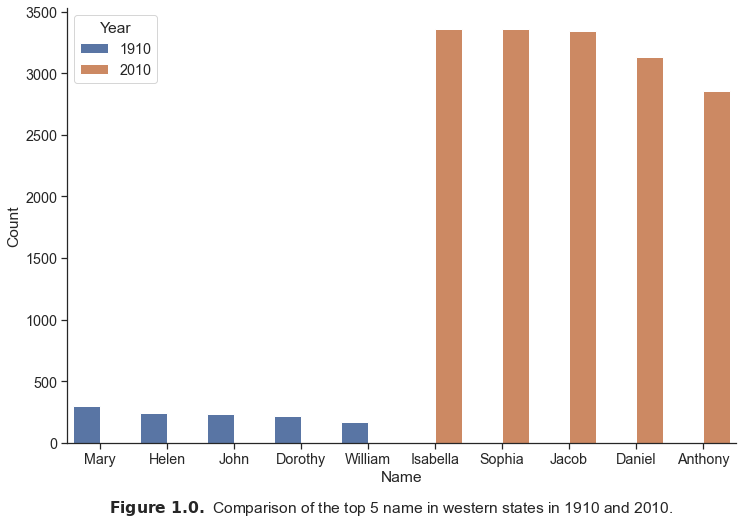

In [71]:
# In order to visualize the influence of time, I will focus on change of names in just western states over the 100 years
# I will combine the 1910 and 2010 western states dataset for comparison
# Barplot is used for visualisation as it allows direct numerical value comparison
sns.set_theme(context="notebook", style="ticks",  font_scale= 1.3)
fig = plt.figure(figsize=(12,8))
west_time = pd.concat([west_1910, west_2010], axis=0)
w_t = sns.barplot(x="Name",
            y='Count', 
            data= west_time,
           hue = "Year")
fig.text(x=0.5,
          y=0.005,
          ha='center',
          s=r"${\bf Figure\ 1.0.}$ Comparison of the top 5 name in western states in 1910 and 2010.")
sns.despine()

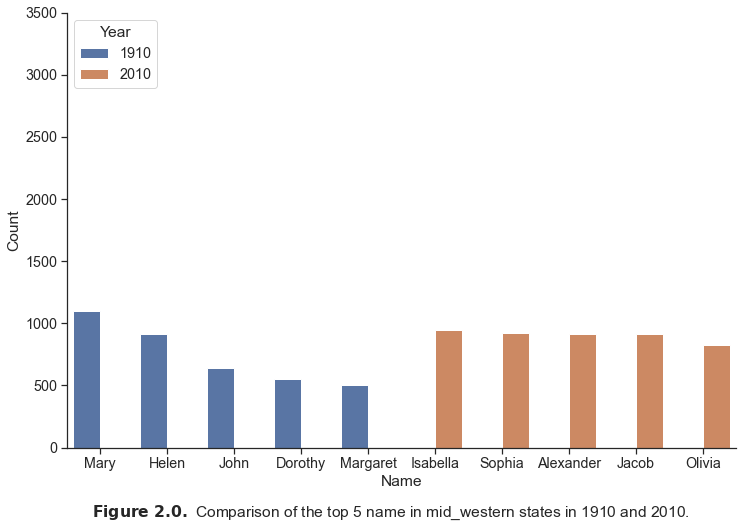

In [72]:
# Same analysis are done with mid_western states as well
sns.set_theme(context="notebook", style="ticks",  font_scale= 1.3)
fig = plt.figure(figsize=(12,8))
mw_time = pd.concat([mw_1910, mw_2010], axis=0)
mw_t = sns.barplot(x="Name",
            y='Count',
            data= mw_time,
           hue = "Year")
# Scaling the y axis
mw_t.set_ylim(top=3500)
mw_t.legend(loc=2, title="Year")
fig.text(x=0.5,
          y=0.005,
          ha='center',
          s=r"${\bf Figure\ 2.0.}$ Comparison of the top 5 name in mid_western states in 1910 and 2010.")
sns.despine()

**Observation**

We see that the top 5 names in both eastern and western states changed completely in 100 years.There is no name that overlap within the 100 yeras period. 

The frequency of the name occur is much higher in 2010 in werstern states most likely because the popular growth. On the other hand in mid_wester states the population did not have as significant increase which we can see the number of counts. 

Interestingly, we see similar names appear between regions. Therefore, the next section I will analyze names and the ***regional difference***

### C1.2 Regional differences**

In [73]:
# First, let's compare top 5 names in western and mid_west states just in 1910
#I assign a new variable "Region" for analysis
west2_1910 = west_1910.assign(Region="West")
mw2_1910 = mw_1910.assign(Region="Mid_west")
region_1910= pd.concat([west2_1910, mw2_1910],axis=0).reset_index(drop=True)
region_1910

,Name,Year,State,Count,Region
0,Mary,1910,CA,295,West
1,Helen,1910,CA,239,West
2,John,1910,CA,237,West
3,Dorothy,1910,CA,220,West
4,William,1910,CA,170,West
5,Mary,1910,OH,1099,Mid_west
6,Helen,1910,IL,917,Mid_west
7,John,1910,IL,644,Mid_west
8,Dorothy,1910,IL,553,Mid_west
9,Margaret,1910,IL,501,Mid_west


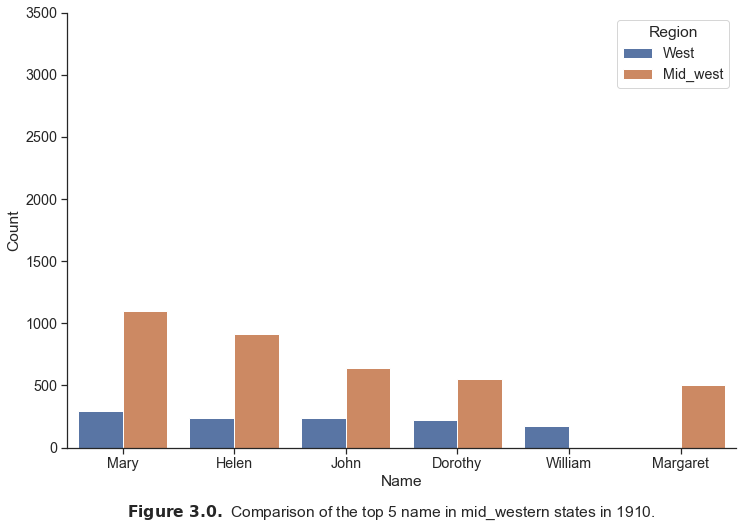

In [74]:
# Now Let's visualize it with bar graph
sns.set_theme(context="notebook", style="ticks",  font_scale=1.3)
fig = plt.figure(figsize=(12,8))
states1= sns.barplot(x='Name',y='Count',data= region_1910, hue='Region')
states1.set_ylim(top=3500)
states1.legend(loc=1, title="Region")
fig.text(x=0.5,
          y=0.005,
          ha='center',
          s=r"${\bf Figure\ 3.0.}$ Comparison of the top 5 name in mid_western states in 1910.")
sns.despine()

In [75]:
west2_2010 = west_2010.assign(Region="West")
mw2_2010 = mw_2010.assign(Region="Mid_west")
region_2010= pd.concat([west2_2010, mw2_2010],axis=0).reset_index(drop=True)
region_2010

,Name,Year,State,Count,Region
0,Isabella,2010,CA,3364,West
1,Sophia,2010,CA,3357,West
2,Jacob,2010,CA,3347,West
3,Daniel,2010,CA,3131,West
4,Anthony,2010,CA,2858,West
5,Isabella,2010,IL,944,Mid_west
6,Sophia,2010,IL,918,Mid_west
7,Alexander,2010,IL,914,Mid_west
8,Jacob,2010,IL,911,Mid_west
9,Olivia,2010,IL,823,Mid_west


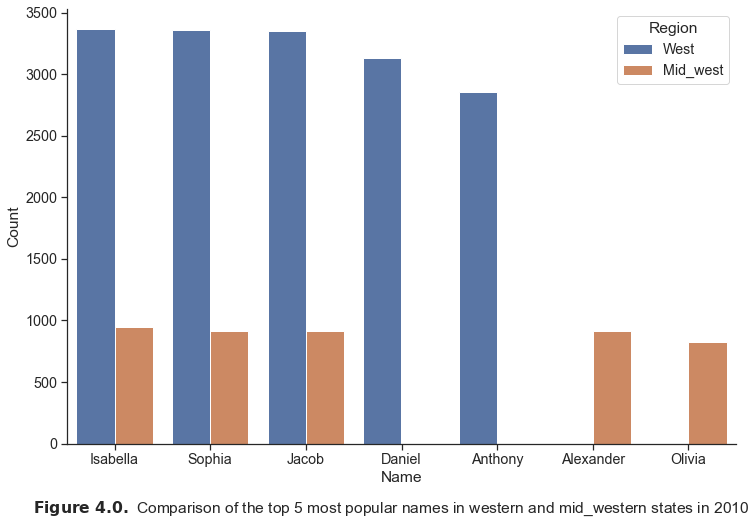

In [76]:
sns.set_theme(context="notebook", style="ticks",  font_scale=1.3)
fig = plt.figure(figsize=(12,8))
states1= sns.barplot(x='Name',y='Count',data= region_2010, hue='Region')
states1.legend(loc=1, title="Region")
fig.text(x=0.5,
          y=0.005,
          ha='center',
          s=r"${\bf Figure\ 4.0.}$ Comparison of the top 5 most popular names in western and mid_western states in 2010")
sns.despine()

**Observation**

We can see that between west and mid- western regions, there are similarity in naming within a year.

In 1910, Mary, Helen, John and Dorothy are in the top 5 most popular name in both western and mid_western states
In 2010, Isbella, Sophia and Jacob are popular in both western and mid_western name.

We also found that in this year (2010), these top three names are much more popular in western states. Conversely in 1910, the top 4 names are more popular in Mid_western names in stead. 

### C2.0 Overall analysis

In [77]:
# The last step is to take a look at the questions overall in the big picture
# Similarly we have to assign a new variable "Region", and combine all the datasets for analysis
new_mw_time= mw_time.assign(Region= "Mid_West")
new_west_time= west_time.assign(Region="Western")
region_time = pd.concat([new_mw_time, new_west_time], axis=0).reset_index(drop=True)
region_time

,Name,Year,State,Count,Region
0,Mary,1910,OH,1099,Mid_West
1,Helen,1910,IL,917,Mid_West
2,John,1910,IL,644,Mid_West
3,Dorothy,1910,IL,553,Mid_West
4,Margaret,1910,IL,501,Mid_West
5,Isabella,2010,IL,944,Mid_West
6,Sophia,2010,IL,918,Mid_West
7,Alexander,2010,IL,914,Mid_West
8,Jacob,2010,IL,911,Mid_West
9,Olivia,2010,IL,823,Mid_West


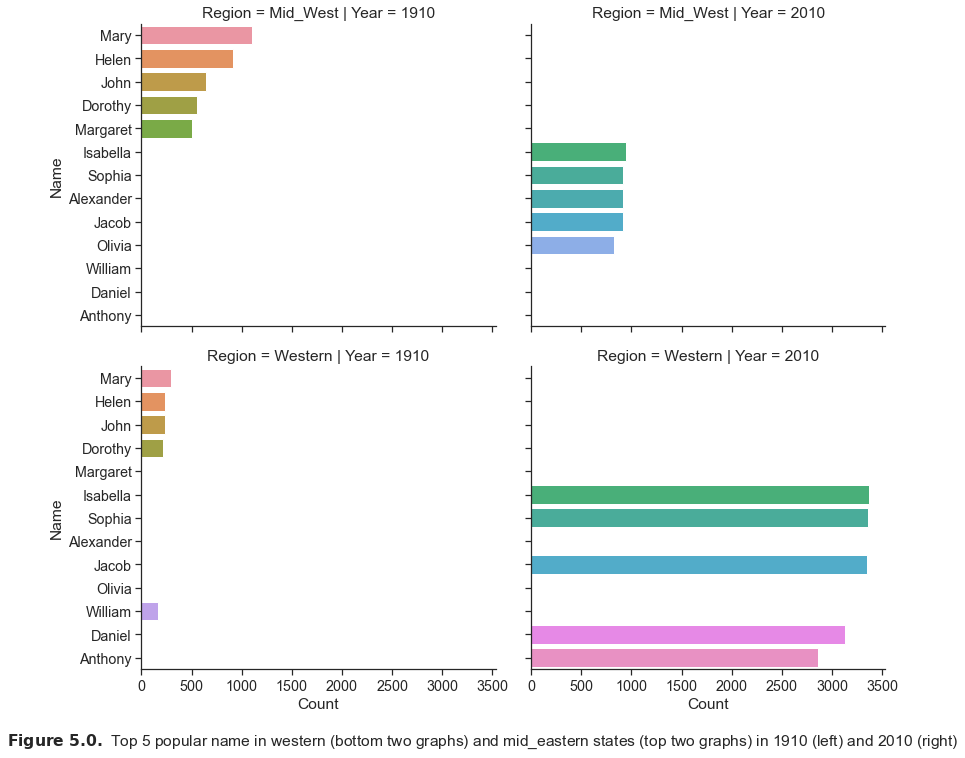

In [78]:
# Let's visualize the four datasets in one carplot for good comparison
sns.set_theme(font_scale=1.3,style="ticks")
grid = sns.catplot(data=region_time,
            x="Count",
            y="Name",
            col="Year",
            row="Region",
            kind="bar",
            aspect=1.2
            ).despine()
grid.fig.text(x=0.5,
              y=-0.05,
              ha='center',
              s=r"${\bf Figure\ 5.0.}$ Top 5 popular name in western (bottom two graphs) and mid_eastern states (top two graphs) in 1910 (left) and 2010 (right)")
plt.show()

## Summary

In conclusion, our analysis showed that there is no similarity of naming over time. The top 5 names are different in 1910 and 2010 are completely different.

However, trend in naming is observed between the region; Several names are popular in both western and mid_western states in a specific year (2010 or 1910)


 ## The following analysis is done in preparation of the Task 5 Group analysis

*Note: We share some codes for repetitive analysis
Below is a summary of combination of all four regions analysis, which you will be seeing in the Group analysis file.

### General Queation:
**What is the top 5 names in mid-western states and western states at all times (1910-2015)?**

In [79]:
n_df = state_df.loc[state_df["State"].isin(pf.NORTH_EAST)].reset_index(drop=True)
s_df = state_df.loc[state_df["State"].isin(pf.SOUTH)].reset_index(drop=True)

In [80]:
# Define processing function
def get_top5_all_time(data=None):
    if data is None:
        return data
    return (data.groupby(by="Name")
              .aggregate("sum")
              .drop(columns=["Year"]) # We do not analyze with time
              .reset_index()
              .sort_values(by="Count", ascending=False)
              .head()
           )
# For the middle_west
top5_mw = get_top5_all_time(mw_df)
# For the west
top5_west = get_top5_all_time(west_df)
# For the North
top5_n = get_top5_all_time(n_df)
# For the south
top5_s = get_top5_all_time(s_df)

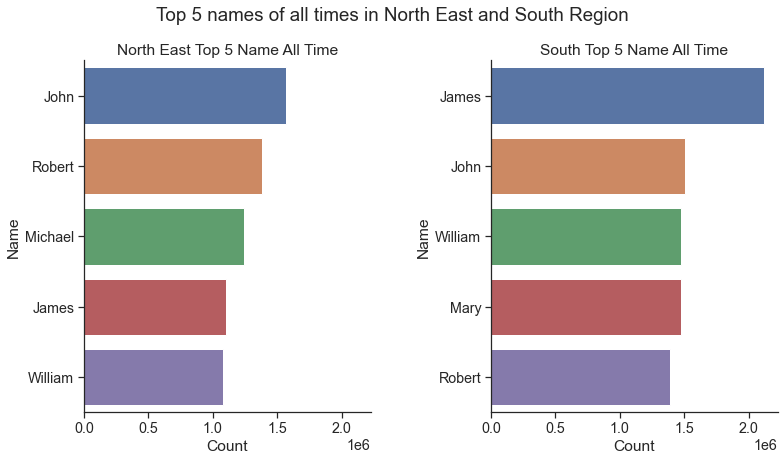

In [83]:
# Jamie's analysis
sns.set_theme(context="notebook", style="ticks",  font_scale=1.3)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,7), sharex=True)

# North graph
north = sns.barplot(y="Name",
            x="Count",
            data=top5_n,
            order=top5_n["Name"],
            ax=ax[0]
            )
north.set_title("North East Top 5 Name All Time")

# South graph
south = sns.barplot(y="Name",
            x="Count",
            data=top5_s,
            order=top5_s["Name"],
            ax=ax[1])
south.set_title("South Top 5 Name All Time")

# Show plot
sns.despine()
fig.tight_layout(pad=3.0)
fig.suptitle("Top 5 names of all times in North East and South Region")
plt.show()

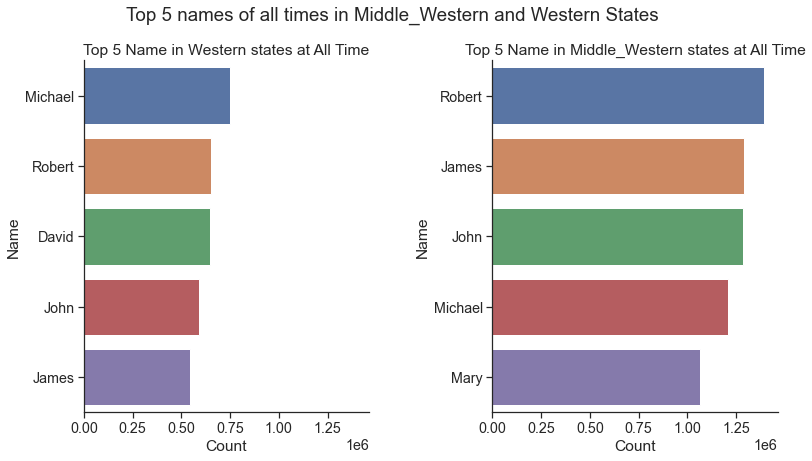

In [81]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,7), sharex=True)
# Western graph
west = sns.barplot(y="Name",
            x="Count",
            data=top5_west,
            order=top5_west["Name"],
            ax=ax[0])
west.set_title("Top 5 Name in Western states at All Time")

# Middle wester graph
middle_west = sns.barplot(y="Name",
            x="Count",
            data=top5_mw,
            order=top5_mw["Name"],
            ax=ax[1])
middle_west.set_title("Top 5 Name in Middle_Western states at All Time")


# Show plot
sns.despine()
fig.tight_layout(pad=3.0)
fig.suptitle("Top 5 names of all times in Middle_Western and Western States")
plt.show()

### Time period Question

**Compare the most popular name at the state and national leve in a decade: What is the most popular name in each year from 2000-2014?**

### Gender Question
**Compare the most popular national female name over the time period with the four different four regions? **

In [84]:
# Function for filter data based on gender
def get_top_5(data, region, gender):
    return (data.groupby(by="Name")
                   .agg(np.sum)
                   .sort_values(by="Count", ascending=False)
                   .head()
                   .drop(columns="Year") # We do not care about year
                   .assign(Region=region, Gender=gender)
                   .reset_index()
            )

# Girl's name In the North
top5_female_n = (get_top_5(n_df.loc[n_df["Gender"] == "F"], "NE", "F"))

# Girl's Name In the South
top5_female_s = (get_top_5(s_df.loc[s_df["Gender"] == "F"], "S", "F"))
                             
# Girl's Name In the West
top5_female_w = (get_top_5(west_df.loc[west_df["Gender"] == "F"], "W", "F"))
                          
# Girl's Name In the Middle_West
top5_female_mw = (get_top_5(mw_df.loc[mw_df["Gender"] == "F"], "MW", "F"))

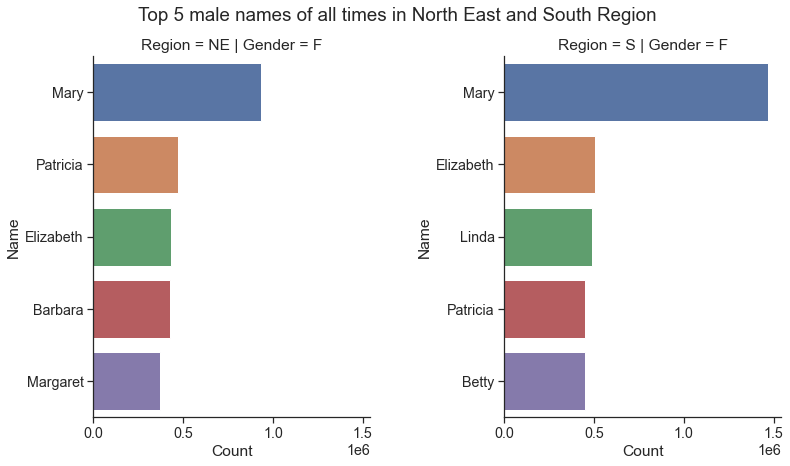

In [85]:
# Settings
sns.set_theme(style="ticks", font_scale=1.3)
fig,ax= plt.subplots(1,2, figsize=(12,7), sharex=True)

def draw_gender_plot(axes, data_list, result_axes=None):
    if result_axes is None:
        result_axes = list()
    for i in range(len(ax)):
        data = data_list[i]
        ax_ij = sns.barplot(x="Count",
                      y="Name",
                      data=data,
                      ax=ax[i]
                     )
        region, gender = data["Region"][0], data["Gender"][0]
        ax_ij.set_title(f"Region = {region} | Gender = {gender}")
        result_axes.append(ax_ij)
            
    return result_axes

draw_gender_plot(ax, [top5_female_n,top5_female_s])

# Show plot
sns.despine()
fig.tight_layout(pad=2.7)
fig.suptitle("Top 5 male names of all times in North East and South Region")
plt.show()

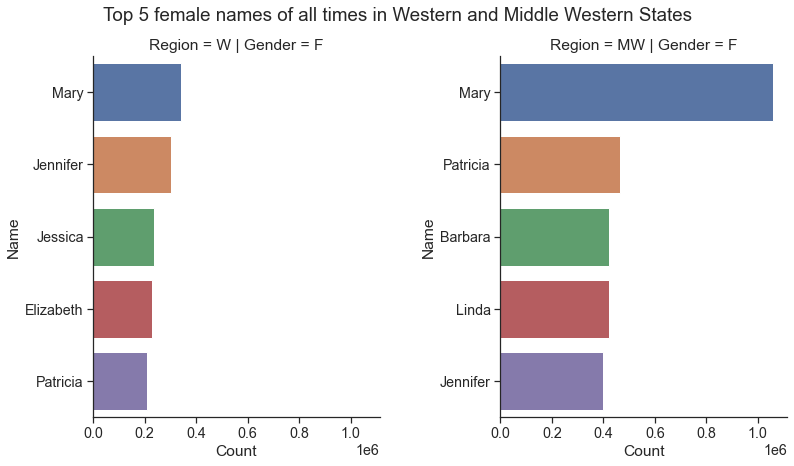

In [87]:
sns.set_theme(style="ticks", font_scale=1.3)
fig,ax= plt.subplots(1,2, figsize=(12,7), sharex=True)

draw_gender_plot(ax, [top5_female_w, top5_female_mw])
# Show plot
sns.despine()
fig.tight_layout(pad=2.7)
fig.suptitle("Top 5 female names of all times in Western and Middle Western States")
plt.show()

In [89]:
# Find top 5 in 1910 in the North East
top5_1900_n = (n_df.loc[n_df["Year"] == 1910]
                   .groupby(by="Name").agg(np.sum)
                   .drop(columns="Year")
                   .sort_values(by="Count", ascending=False)
                   .head()
                   .index
              )

# Pivot table of Years vs Name (top 5)
n_year = (n_df.loc[n_df["Name"].isin(top5_1910_n)]
              .pivot_table(index="Year",columns="Name",values="Count", aggfunc=np.sum)
          )
# Find the total count in each year
y = n_df.groupby(by="Year").agg(np.sum)
for year in range(1910, 2015):
    n_year.loc[year,:] = n_year.loc[year,:]/y.loc[year,"Count"]
n_year

NameError: name 'top5_1910_n' is not defined